In [2]:
!pip install statsmodels
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.9 MB/s eta 0:00:00


## Imports

In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

## Gdrive

In [4]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/NewsStocksData
!ls

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1aXOjAYzBS5Ny20kYb43fbgy4HTmK06JQ/NewsStocksData
catboost_info  iTransformer-main  result_long_term_forecast.txt  test_results
checkpoints    lightning_logs	  results			 Time-Series-Library-main
data.csv       new.xlsx		  rss_data.csv			 yahoo_data.xlsx


## Read data & EDA

In [5]:
df = pd.read_excel('new.xlsx')

In [6]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary
0,1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041


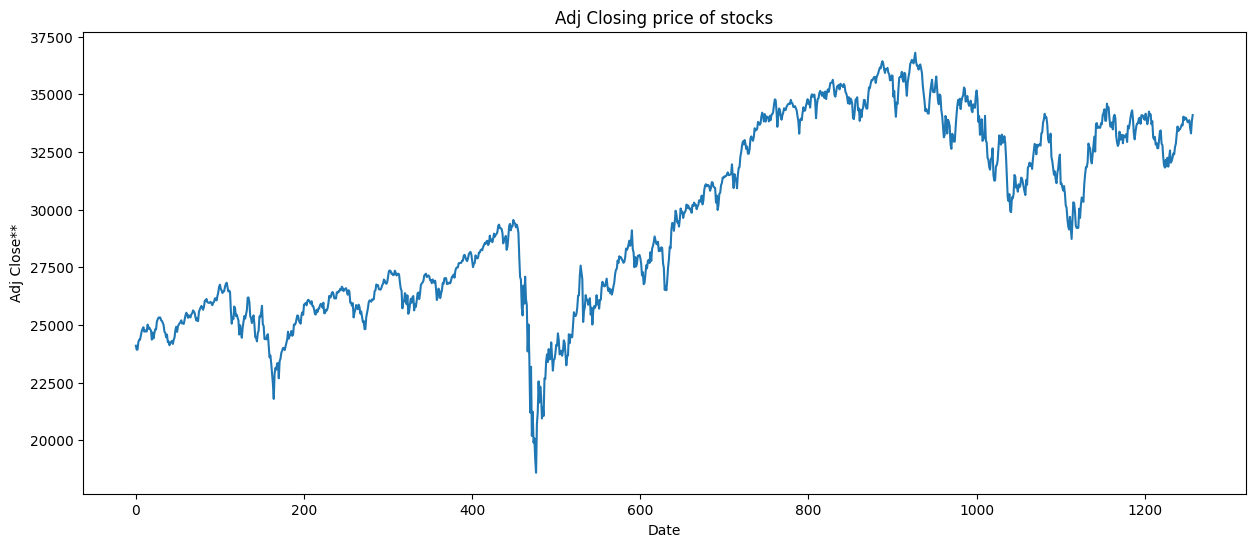

In [ ]:
 df["Adj Close**"].plot(figsize=(15, 6))
 plt.xlabel("Date")
 plt.ylabel("Adj Close**")
 plt.title("Adj Closing price of stocks")
 plt.show()

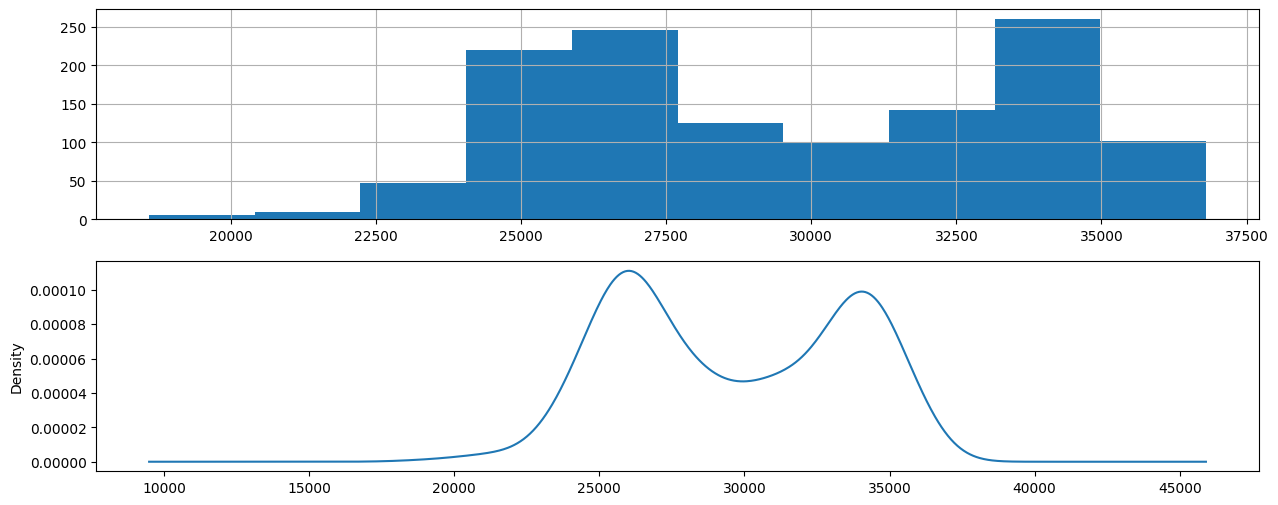

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Adj Close**"].hist()
plt.subplot(212)
df["Adj Close**"].plot(kind='kde')
plt.show()


## ADfuller test

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
  def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
  print('Evaluation metric results:-')
  print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
  print(f'MSE is : {metrics.mean_absolute_error(y_true, y_pred)}')
  print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
  print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
  print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
  print (f'Results of Dickey-Fuller Test for column: {column_name}')
  dftest = adfuller(series, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value','No Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print (dfoutput)
  if dftest[1] <= 0.05:
    print("Conclusion:====>")
    print("Reject the null hypothesis")
    print("Data is stationary")
  else:
    print("Conclusion:====>")
    print("Fail to reject the null hypothesis")
    print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Adj Close**' ],'Adj Close**')

Results of Dickey-Fuller Test for column: Adj Close**
Test Statistic                   -1.615959
p-value                           0.474849
No Lags Used                      9.000000
Number of Observations Used    1248.000000
Critical Value (1%)              -3.435601
Critical Value (5%)              -2.863859
Critical Value (10%)             -2.568004
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


## Fix test size

In [ ]:
TEST_SIZE = int(len(df)*0.25)

#SARIMA

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

In [ ]:
X = df[['Adj Close**']]
X = X.set_index(df['Date'])
X = X.dropna()
train, test = X[0:-TEST_SIZE], X[-TEST_SIZE:]

model = auto_arima(train, start_p=0, start_q=0, max_p=7, max_q=7, seasonal=True,
d=0, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)
model.summary()
model = model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=18340.210, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=17131.144, Time=1.38 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=22066.729, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=13732.076, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=13753.673, Time=1.22 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=13699.664, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=13699.939, Time=1.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=13699.427, Time=1.02 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=2.38 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=13683.598, Time=1.32 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=13652.581, Time=2.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=13700.948, Time=2.19 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   :

In [ ]:
forecast = model.predict(TEST_SIZE)
forecast = pd.DataFrame(forecast)
forecast = forecast.set_index(test.index)

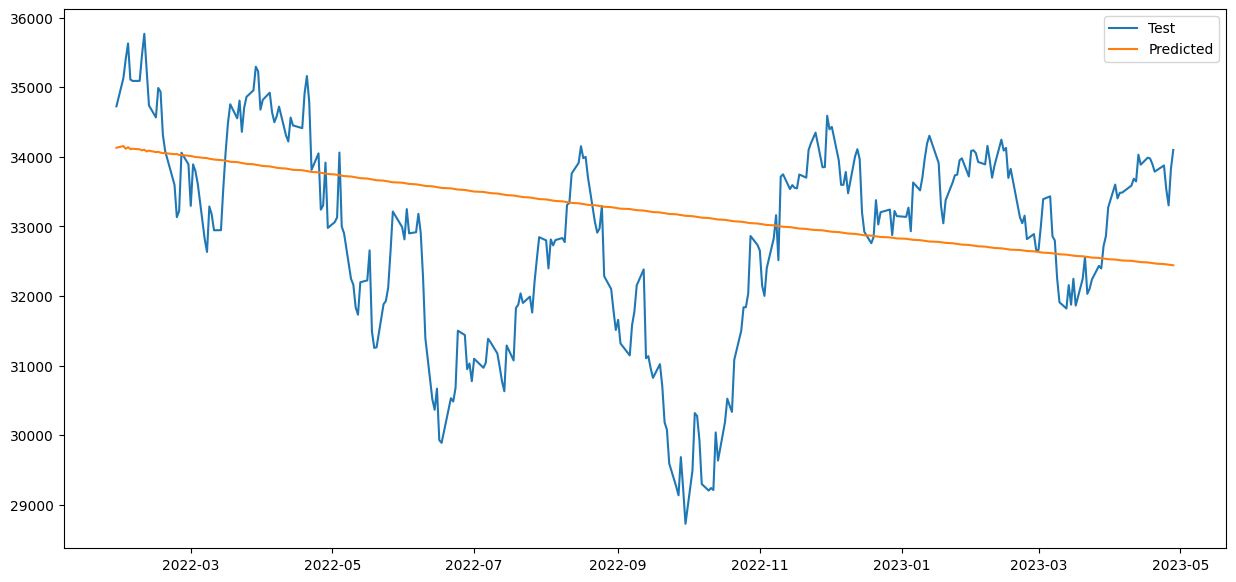

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
leg = plt.legend(loc='best')
plt.show()

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 2323703.248009883
MSE is : 1206.462237385776
RMSE is : 1524.3697871612003
MAPE is : 3.7746186894124465
R2 is : -0.10278698610040626



# ARMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(1,0,1)).fit()

In [ ]:
forecast = model.forecast(TEST_SIZE)
forecast = pd.DataFrame(forecast)
forecast = forecast.set_index(test.index)

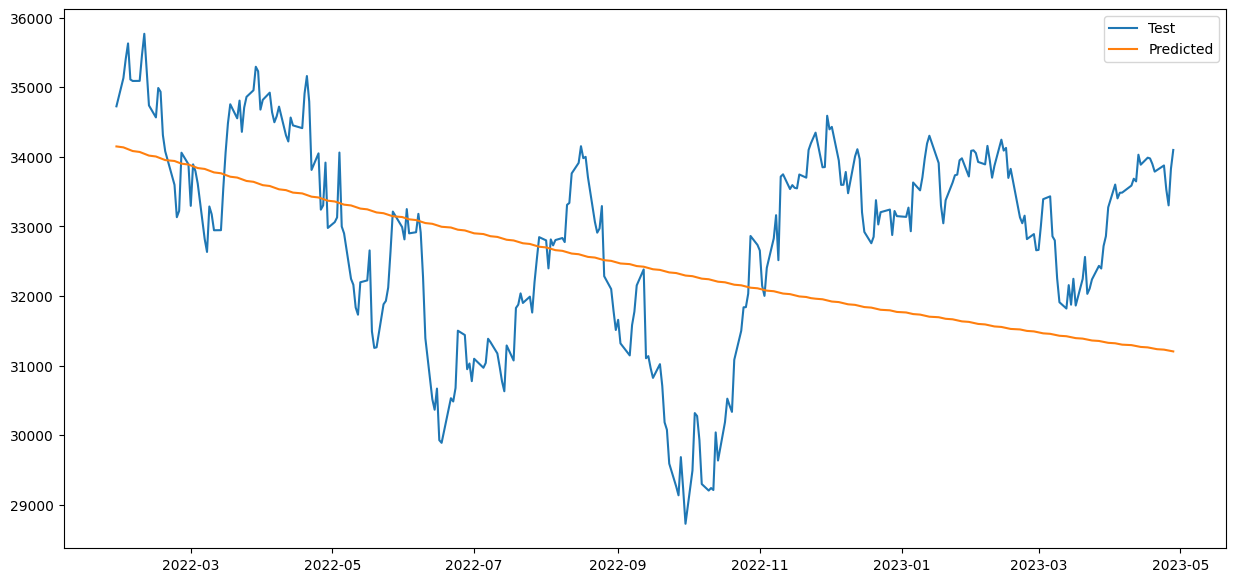

In [ ]:
plt.rcParams["figure.figsize"] = [15, 7]
plt.plot(test, label='Test')
plt.plot(forecast, label='Predicted')
leg = plt.legend(loc='best')
plt.show()

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 2591580.782944549
MSE is : 1388.8585019363293
RMSE is : 1609.8387443916702
MAPE is : 4.2607761902322645
R2 is : -0.22991675606892925



#GARCH

In [7]:
!pip3 install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 7.5 MB/s eta 0:00:00


In [9]:
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import yfinance as yf

import statsmodels.api as sm
import arch
from statsmodels.compat import lzip

import matplotlib.pyplot as plt

from arch import arch_model
from sklearn.model_selection import train_test_split

In [10]:
df['returns'] = df['Adj Close**'].pct_change()*100
df.head()

,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary,returns
0,1257,2018-05-01,24117.29,24117.29,23808.19,24099.05,380070000,NaN,NaN
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669,-0.722311
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711,0.021609
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547,1.388876
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041,0.390767


In [11]:
df.dropna(inplace = True)
df.head()

,Unnamed: 0,Date,Open,High,Low,Adj Close**,Volume,Adj Close Stationary,returns
1,1256,2018-05-02,24097.63,24185.52,23886.30,23924.98,385350000,-0.561669,-0.722311
2,1255,2018-05-03,23836.23,23996.15,23531.31,23930.15,389240000,0.016711,0.021609
3,1254,2018-05-04,23865.22,24333.35,23778.87,24262.51,329480000,1.070547,1.388876
4,1253,2018-05-07,24317.66,24479.45,24263.42,24357.32,307670000,0.304041,0.390767
5,1252,2018-05-08,24341.35,24412.34,24198.34,24360.21,344940000,0.009258,0.011865


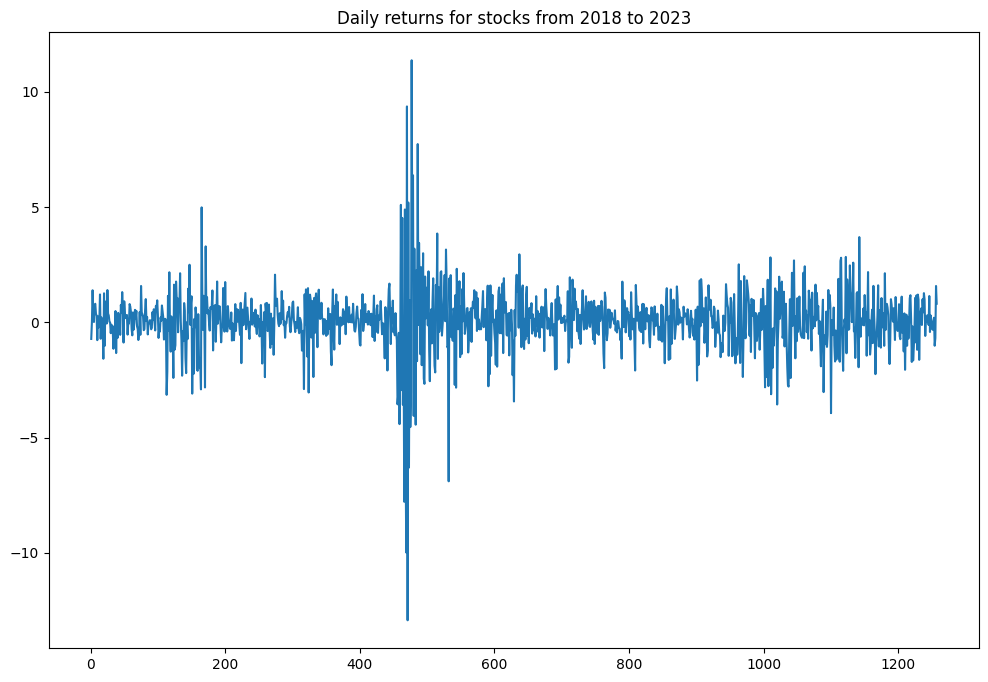

In [12]:
plt.figure(figsize=(12,8))
df['returns'].plot()
plt.title('Daily returns for stocks from 2018 to 2023')
plt.show()

In [13]:
print(f'Mean of Daily Returns = {df.returns.mean()}')

Mean of Daily Returns = 0.03677754655200348


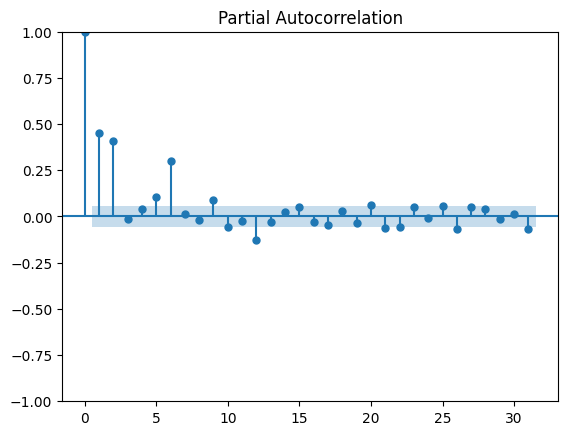

In [14]:
plot_pacf(df['returns']**2)
plt.show()

In [15]:
split_size = int(len(df)*0.3)
X = df[['returns']]
train, test = X[0:-split_size], X[-split_size:]

In [22]:
model = arch.arch_model(train, mean='Zero', vol = 'GARCH', p = 1, q = 1, rescale = False)
results = model.fit(disp='off',show_warning = False)
residuals = results.resid
squared_residuals = residuals**2
conditional_variances = results.conditional_volatility ** 2
mse = np.mean((squared_residuals - conditional_variances) ** 2)
print(f'Mean Squared Error: {mse}')
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

Mean Squared Error: 45.36348663147524
ARCH test results:

LM Statistic: 345.3354892285752
p-value: 3.8913812515003265e-68
F Statistic: 47.35274057062598
p-value: 3.372048637412033e-80


In [17]:
rolling_predictions = []
test_size = int(len(df)*0.3)

returns = df['returns']

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, mean='Zero', vol = 'GARCH', p = 1, q = 1, rescale = False)
    model_fit = model.fit(disp='off', show_warning = False)
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [18]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])

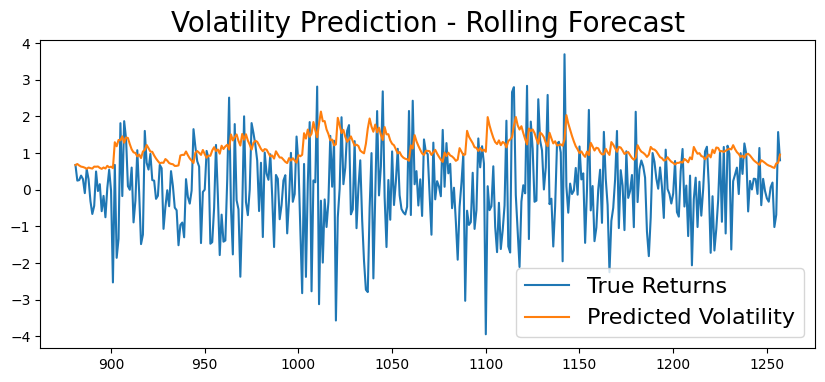

In [19]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# RNNs

Testing RNN on randomply formed dataset

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Generate a simple time-series data
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis]

# Prepare the data
n_steps = 50
series = generate_time_series(10000, n_steps + 1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# Predict future values
y_pred = model.predict(X_test)


Epoch 1/20
219/219 [==============================] - 6s 19ms/step - loss: 0.0504 - val_loss: 0.0584
Epoch 2/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0238 - val_loss: 0.0115
Epoch 3/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0077 - val_loss: 0.0063
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0052 - val_loss: 0.0044
Epoch 6/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 7/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 8/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 10/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0044 - val_lo

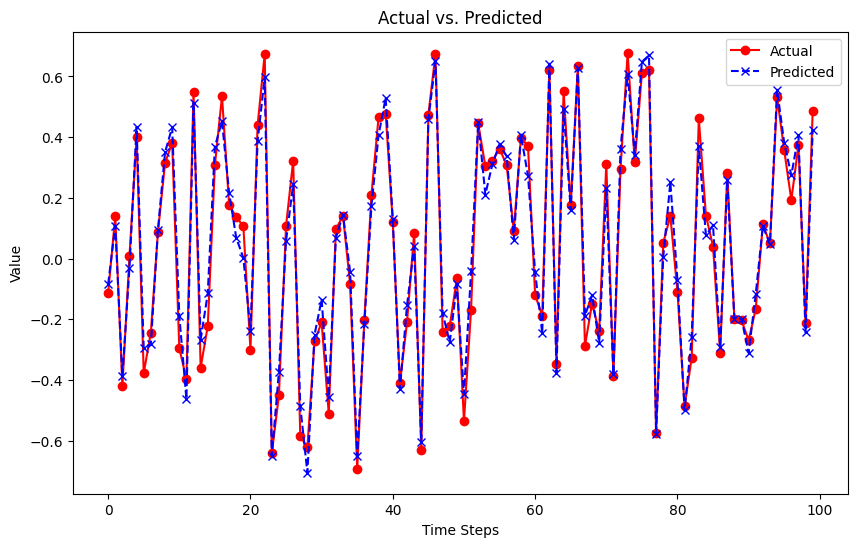

In [24]:
import matplotlib.pyplot as plt

# Select a segment of the test data to visualize
n_visualize = 100  # Number of steps to visualize

# Actual vs. Predicted plot
plt.figure(figsize=(10, 6))
plt.plot(y_test[:n_visualize], marker='o', label='Actual', linestyle='-', color='r')
plt.plot(y_pred[:n_visualize], marker='x', label='Predicted', linestyle='--', color='b')
plt.title('Actual vs. Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()

In [26]:
# Calculate the MSE
mse = np.mean(np.square(y_pred.squeeze() - y_test.squeeze()))

print(f'Mean Squared Error (MSE) on Test Set: {mse}')


Mean Squared Error (MSE) on Test Set: 0.0031363424234732143


## Testing RNN on provided dataset

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense



# Assuming 'Adj Close**' is what we want to predict, let's normalize this column
scaler = MinMaxScaler(feature_range=(0, 1))
df['Adj Close**'] = scaler.fit_transform(df[['Adj Close**']].values)

# Function to create sequences
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Prepare the data
look_back = 1
data = df['Adj Close**'].values
data = data.reshape(-1, 1)

# Split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]

# Reshape into X=t and Y=t+1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [28]:
# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(4, input_shape=(1, look_back)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model_lstm.predict(X_train)
testPredict = model_lstm.predict(X_test)


Epoch 1/100
840/840 - 3s - loss: 0.0285 - 3s/epoch - 4ms/step
Epoch 2/100
840/840 - 1s - loss: 0.0042 - 1s/epoch - 2ms/step
Epoch 3/100
840/840 - 1s - loss: 7.0687e-04 - 1s/epoch - 2ms/step
Epoch 4/100
840/840 - 2s - loss: 3.9825e-04 - 2s/epoch - 2ms/step
Epoch 5/100
840/840 - 2s - loss: 3.9416e-04 - 2s/epoch - 2ms/step
Epoch 6/100
840/840 - 2s - loss: 4.1093e-04 - 2s/epoch - 2ms/step
Epoch 7/100
840/840 - 2s - loss: 4.0335e-04 - 2s/epoch - 2ms/step
Epoch 8/100
840/840 - 1s - loss: 3.9343e-04 - 1s/epoch - 2ms/step
Epoch 9/100
840/840 - 1s - loss: 4.0813e-04 - 1s/epoch - 2ms/step
Epoch 10/100
840/840 - 1s - loss: 4.0833e-04 - 1s/epoch - 2ms/step
Epoch 11/100
840/840 - 1s - loss: 4.0089e-04 - 1s/epoch - 2ms/step
Epoch 12/100
840/840 - 1s - loss: 4.1837e-04 - 1s/epoch - 2ms/step
Epoch 13/100
840/840 - 1s - loss: 4.1347e-04 - 1s/epoch - 2ms/step
Epoch 14/100
840/840 - 1s - loss: 4.0590e-04 - 1s/epoch - 2ms/step
Epoch 15/100
840/840 - 2s - loss: 4.0696e-04 - 2s/epoch - 2ms/step
Epoch 16/100

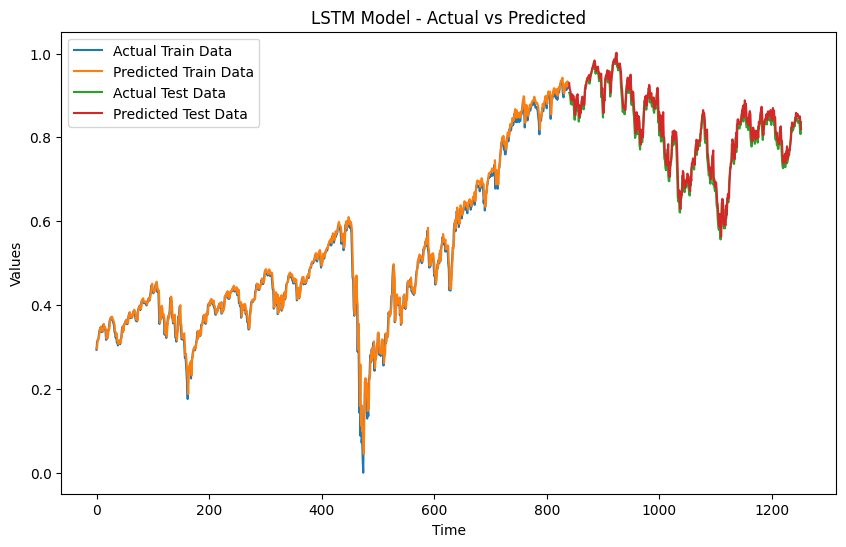

In [34]:
plt.figure(figsize=(10, 6))

# Plotting the actual vs predicted values
plt.plot(Y_train, label='Actual Train Data')
plt.plot(trainPredict, label='Predicted Train Data')
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), Y_test, label='Actual Test Data')
plt.plot(range(len(Y_train), len(Y_train) + len(Y_test)), testPredict, label='Predicted Test Data')

plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

In [35]:
train_mse = mean_squared_error(Y_train, trainPredict)
test_mse = mean_squared_error(Y_test, testPredict)

print(f'Train Mean Squared Error: {train_mse}')
print(f'Test Mean Squared Error: {test_mse}')

Train Mean Squared Error: 0.00040449761068977926
Test Mean Squared Error: 0.0005022523507482175


# APIs for fetching data

## yfinance

In [36]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

ticker = yf.Ticker("AAPL")

info = ticker.info
print("Company Name:", info['shortName'])
print("Sector:", info['sector'])
print("Full time employees:", info['fullTimeEmployees'])

history = ticker.history(period="1mo")
print(history)

dividends = ticker.dividends
print(dividends)

Company Name: Apple Inc.
Sector: Technology
Full time employees: 150000
                                 Open        High         Low       Close  \
Date                                                                        
2024-05-13 00:00:00-04:00  185.440002  187.100006  184.619995  186.279999   
2024-05-14 00:00:00-04:00  187.509995  188.300003  186.289993  187.429993   
2024-05-15 00:00:00-04:00  187.910004  190.649994  187.369995  189.720001   
2024-05-16 00:00:00-04:00  190.470001  191.100006  189.660004  189.839996   
2024-05-17 00:00:00-04:00  189.509995  190.809998  189.179993  189.869995   
2024-05-20 00:00:00-04:00  189.330002  191.919998  189.009995  191.039993   
2024-05-21 00:00:00-04:00  191.089996  192.729996  190.919998  192.350006   
2024-05-22 00:00:00-04:00  192.270004  192.820007  190.270004  190.899994   
2024-05-23 00:00:00-04:00  190.979996  191.000000  186.630005  186.880005   
2024-05-24 00:00:00-04:00  188.820007  190.580002  188.039993  189.979996   
2024

## yahoo_fin

In [1]:
!pip install yahoo_fin

In [2]:
import os
from yahoo_fin.stock_info import get_data
import pandas as pd
from datetime import datetime

def fetch_stock_data(ticker_name):
    now = datetime.now()
    today_date = now.strftime("%Y-%m-%d")
    base_dir = f"rawdata/yahoo_stocks/{ticker_name}"
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)

    try:
        data = get_data(ticker_name)

        if data.empty:
            print(f"No data available for {ticker_name} on {today_date}")
            return

        file_path = os.path.join(base_dir, f"{ticker_name}.csv")
        data.to_csv(file_path)
    except Exception as e:
        print(f"Error fetching data for {ticker_name}: {e}")


list_tickers = ["AMZN", "AAPL", "DELL","LULU"]

for ticker in list_tickers:
    fetch_stock_data(ticker)


In [ ]:
# для быстрого удаления папок
import shutil
import os

directory_path = "rawdata/yahoo_stocks"

if os.path.exists(directory_path):
    shutil.rmtree(directory_path)
    print(f"Directory {directory_path} has been removed")
else:
    print("Directory does not exist")

##Quandl

In [3]:
!pip install quandl
import quandl as quandl


In [4]:
quandl.ApiConfig.api_key = 'nyjwpgHMctUs1UJy-pi6'
mydata = quandl.get("FRED/GDP", start_date="2020-12-31", end_date="2023-9-26")
mydata

,Value
Date,
2021-01-01,22038.226
2021-04-01,22740.959
2021-07-01,23202.344
2021-10-01,23992.355


# WebSocket

getting real-time data from Yahoo Finance

In [5]:
!pip install websockets

In [7]:
from ticker_pb2 import Ticker # из загружаемого файла
import base64
import json
import websockets

In [8]:
def deserialize(message):
    ticker_ = Ticker()
    message_bytes = base64.b64decode(message)
    ticker_.ParseFromString(message_bytes)
    return (ticker_.id, ticker_)

In [ ]:
import json
from websocket import create_connection

ticker_list = ['AMZN']

def yf_input(worker_tickers):
    ws = create_connection("wss://streamer.finance.yahoo.com/")
    ws.send(json.dumps({"subscribe": worker_tickers}))
    while True:
        result = ws.recv()
        print(deserialize(result))
        yield result

# Example:
for message in yf_input(ticker_list):
    pass